## Import required dependancies

CORAL uses ORBIT to determine installation times, therefore the file paths for both CORAL and ORBIT must be included

In [1]:
import sys
sys.path.insert(0, '/Users/sbredenk/Repos/CORAL_analysis/CORAL/CORAL')
sys.path.insert(0, '/Users/sbredenk/Repos/ORBIT')
import yaml
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from CORAL import SharedLibrary, GlobalManager, Pipeline

pull file paths for projects, configuration, and libraries

In [2]:
import os
projects = os.path.join(os.getcwd(), "example_analysis", "pipelines", "example_pipeline.csv")
base = os.path.join(os.getcwd(), "example_analysis", "base.yaml")
library = os.path.join(os.getcwd(), "example_analysis", "library")

## Setup pipeline for run

Provide allocations for all shared vessels. Include the vessel name in the library and the number of vessels in the shared pool as a tuple. Include ports as a list of tuples with each entry including the port region and number of ports in that region.

In [3]:
pipeline = Pipeline(projects, base)

allocations = {
    "wtiv": [('example_heavy_lift_vessel', 2),('example_wtiv', 2)],
    "feeder": ('example_heavy_feeder', 6),
    "port": [('northeast', 1), ('central', 1), ('south', 1)],
}

## Run CORAL

In [4]:
manager = GlobalManager(pipeline.configs, allocations, library_path=library)
# print(pipeline.configs)
manager.run()

ORBIT library intialized at 'C:\Users\sbredenk\Repos\ORBIT\library'


## Understanding Output

Manager logs can be written to dataframe for visualization. Includes "date initialized" which represents start date given by the pipeline input spreadsheet. "Date started" incorporates delays due to vessel/port availability. "Date finished" based on updated start date and installation duration.

In [5]:
df = pd.DataFrame(manager.logs).iloc[::-1]
df = df.reset_index(drop=True).reset_index()

port_map = pipeline.projects[["name", "port_region"]].set_index("name").to_dict()['port_region']
df['port'] = [port_map[name] for name in df['name']]
df

,index,name,Initialized,Started,Finished,Date Initialized,Date Started,Date Finished,port
0,0,project 24,61368,189060.548525,203467.593370,2030-05-01,2044-11-23 13:00:00,2046-07-16 20:00:00,central
1,1,project 18,61368,180648.657111,189060.548525,2030-05-01,2043-12-09 01:00:00,2044-11-23 13:00:00,central
2,2,project 19,52632,171226.001708,180648.657111,2029-05-02,2042-11-11 11:00:00,2043-12-09 01:00:00,central
3,3,project 14,87672,157503.967699,173123.498487,2033-05-01,2041-04-18 16:00:00,2043-01-29 12:00:00,northeast
4,4,project 25,52608,161570.013805,171226.001708,2029-05-01,2041-10-05 03:00:00,2042-11-11 11:00:00,central
5,5,project 22,52608,152432.066480,161570.013805,2029-05-01,2040-09-19 09:00:00,2041-10-05 03:00:00,central
6,6,project 36,61368,151103.148386,157503.967699,2030-05-01,2040-07-26 00:00:00,2041-04-18 16:00:00,south
7,7,project 21,52608,143436.473194,152432.066480,2029-05-01,2039-09-10 13:00:00,2040-09-19 09:00:00,central
8,8,project 35,61368,144702.329073,151103.148386,2030-05-01,2039-11-02 07:00:00,2040-07-26 00:00:00,south
9,9,project 34,52608,130295.284229,144702.329073,2029-05-01,2038-03-12 00:00:00,2039-11-02 07:00:00,south


(19448.0, 27985.833333333332)

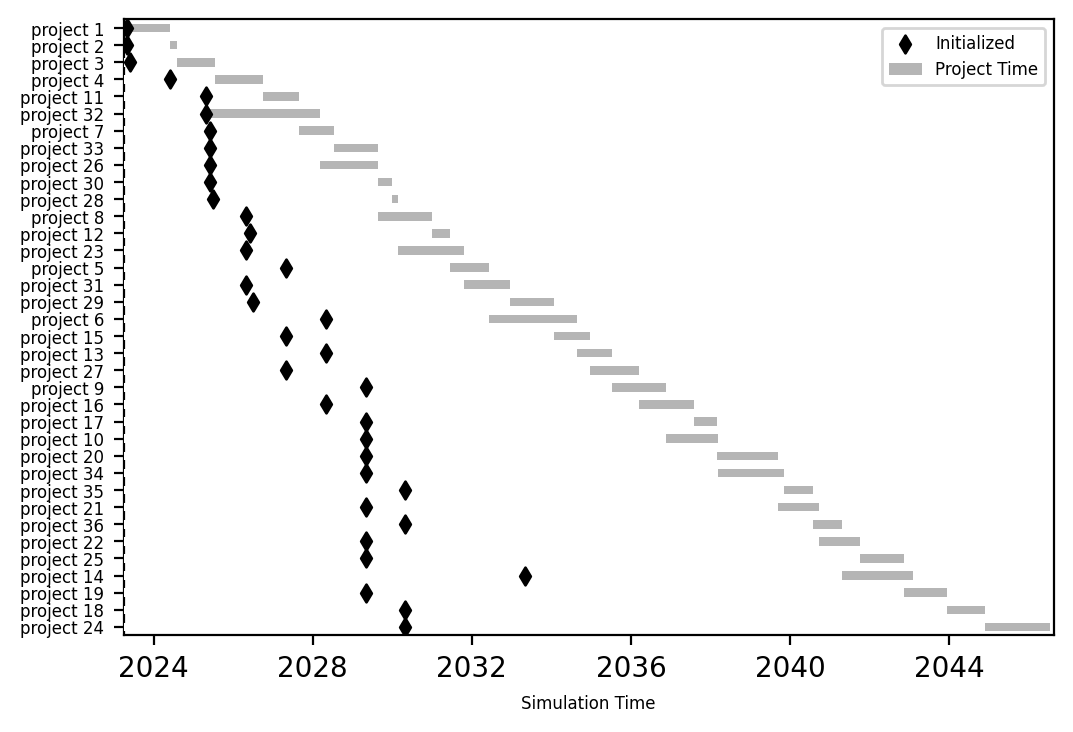

In [13]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

color_map = {
    "northeast": "tab:green",
    "central": "tab:red",
    "south": "tab:blue"
}

df["Date Finished"].plot(kind="barh", ax=ax, zorder=4, label="Project Time", color="#B5B5B5")
df["Date Started"].plot(kind="barh", color="w", ax=ax, zorder=4, label="__nolabel__")

df.plot(kind="scatter", x="Date Initialized", y="index", color='k', ax=ax, zorder=5, label="Initialized", marker="d")
# df.plot(kind="scatter", x="request-wtiv-date", y="index", color='tab:orange', ax=ax, zorder=5, label="WTIV", marker="x")

groups = df.groupby("port")
# for name, group in groups:
#     group.plot(kind="scatter", x="request-port-date", y="index", ax=ax, marker="x", c=color_map[name], zorder=5, label=f"{name} ports".capitalize())

ax.set_xlabel("Simulation Time", fontsize=6)
ax.set_ylabel("")
_ = ax.set_yticklabels(df['name'], fontsize=6)

ax.legend(fontsize=6)

ax.set_xlim(manager._start - dt.timedelta(days=30), df["Date Finished"].max() + dt.timedelta(days=30))